<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Sentiment_Analysis_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **CASE**: Avaliação de aplicativos de comida do Google Play

# Scraping

In [ ]:
# Google play scraper: https://github.com/JoMingyu/google-play-scraper
!pip install google_play_scraper

## Select apps_ids

Vamos selecionar apps nacionais de comida.

In [ ]:
apps_ids = ['br.com.brainweb.ifood',
            'com.mcdo.mcdonalds',
            'habibs.alphacode.com.br',
            'com.ubercab.eats',
            'burgerking.com.br.appandroid',
            'com.grability.rappi',
            'com.xiaojukeji.didi.brazil.customer',
            'com.vanuatu.aiqfome',
            ]


## Get app info (app_id)

In [ ]:
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app

app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

## Scraping App Reviews



In [ ]:
app_reviews = []

for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 8/8 [00:17<00:00,  2.22s/it]


## Saving reviews in a DataFrame

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head()

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=app_reviews_df)
plt.title('Score distribution')
plt.show()

#### Q1. Quantos reviews foram coletados de cada appId?

In [ ]:
# seu código

In [ ]:
app_reviews_df.to_csv('app_reviews_df.csv',index=None)

# **Importante: WITHOUT SCRAPING**

As informações que você coletou mudam a toda hora... afinal, aparecem novas revisões a cada dia. Então vamos empregar um dataset comum a todos.

In [ ]:
df = pd.read_csv("https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/app_reviews_df.csv")
df.head()

#### Q2. Quais scores estão mais presentes na base de dados?

In [ ]:
# Seu código

## Sentiment from score

Crie uma atributo `sentiment` em `df` atribuindo os seguintes sentimentos a cada review:

<br>

$-1$, negativo se `score` $\le 2$,

$0$, neutro se `score` $= 3$,

$+1$, positivo se `score` $\gt 3$

In [ ]:
# Seu código

## Load `nltk`

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Q3. Acesse a lista de `stopwords` em português (`stopwords.words('portuguese')`). Qual a posição da `stopword` "não"?

In [ ]:
# Seu código

## Use a seguinte função de pré-processamento de textos

In [ ]:
def text_preprocessing(s):
    # Always lower
    s = s.lower()
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\!\?\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove stopwords except 'não' e 'nem'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('portuguese')
                  or word in ['não','nem']])

    return s


Crie uma lista `X_preprocessed` em que cada elemento é texto de revisão (`df.content`) pré-processado pela função acima.

<small>
nota: talvez pudéssemos empregar o preprocessor na função de tokenização, ou mesmo o stop_words da função, mas aqui vamos por partes...

In [ ]:
# Seu código

In [ ]:
#@markdown Check if True
X_preprocessed[7000][0:100] == 'última atualização fica apresentando erro conexão parece internet caiu sendo verifiquei tá tudo ok a'

True

## TF-IDF

Empregue o estimador de TF-IDF de textos do `scikit-learn` com os seguintes parâmetros,

```
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         ...
```

e o máximo tamanho de representação dos texto com 4096, para criar representações TF-IDF dos textos pré-processados de `X_preprocessed`.

**Lembre-se**, um estimador possui métodos `fit()` e `transform()`...







In [ ]:
# Seu código

In [ ]:
#@markdown Check if True
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ].sum() == 32688.35610195654

True

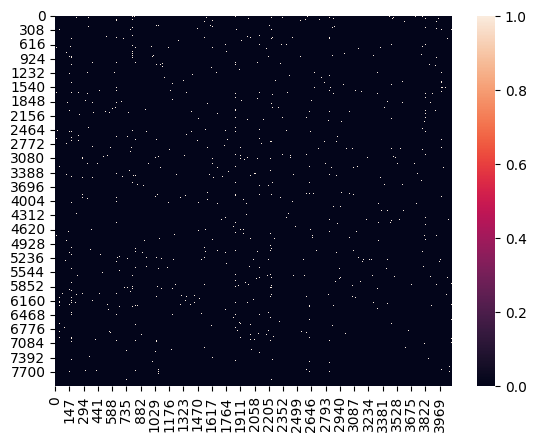

In [ ]:
X0 = X_tfidf.toarray() != 0
sns.heatmap(X0)
plt.show()

## KNeighborsClassifier

Empregue os valores TF-IDF obtidos dos textos de review acima, `X_tfidf`, para fazer uma classificação do sentimento das revisões. **Empregue o modelo de K-vizinhos mais próximos, com `k=8` e função distância cosseno.**

Empregue `random_state=1`, 0.3 de dados de teste estratificados.

In [ ]:
# Seu código

#### Q4. Qual a acuracidade obtida do modelo de K-vizinhos mais próximos?







#### Q5. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!'. Ambas deram o resultado esperado?

In [ ]:
# Seu código

## RandomForestClassifier

Altere o código do modelo anterior para empregar uma Floresta de Árvores Aleatórias não esquecendo de empregar `random_state=1`.

In [ ]:
# Seu código

#### Q6. Qual a acuracidade obtida do modelo de Floresta?







#### Q7. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!' com o novo modelo. Ambas deram o resultado esperado?

In [ ]:
# Seu código

## RandomForestClassifier

Altere o código do modelo Floresta de Árvores Aleatórias anterior agora para classificar o score dos reviews.

In [ ]:
# Seu código

#### Q8. Qual a acuracidade obtida na classificação do score dos reviews?